Project title: Analyzing Turnover for KM Airlines-Dulles VA
Team Members:
•	Kirun Dar
•	Magdy Gad
•	Francis Kang
Project Description /outline:
KM Airlines is a charter airline company currently located in northern Virginia area. It currently flies from DCA, IAD and BWI Airports. The IAD airport of location is experiencing a high turnover. The CEO of KM Airlines has requested the financial analyst and HR analyst of his organization to provide an analysis on the causes for the high turnover as well as recommendations.
Research questions:
1.	How are the following variables affecting the turnover?
a.	Termination Cause
b.	Wage analysis 
o	Competitors 
o	Cost per hire
o	Overtime 
c.	Total compensations
d.	Benefits
e.	Cost of living
f.	Age distribution
g.	Demographics



In [107]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests as req
import locale
from itertools import groupby

In [108]:
overtime = pd.read_csv("../Airline/Overtime.csv")
overtime

,COMPANY,WAGE-OVERTIME HOURS,PER-END-DATE
0,PAX,6.0,17-Jan
1,RAMP,7.0,17-Jan
2,RAMP,8.0,17-Jan
3,RAMP,9.0,17-Jan
4,RAMP,10.0,17-Jan
5,RAMP,11.0,17-Jan
6,RAMP,12.0,17-Jan
7,RAMP,13.0,17-Jan
8,RAMP,15.0,17-Jan
9,RAMP,16.0,17-Jan


In [109]:
seniority = pd.read_csv("../Airline/IAD Overhead Seniority.csv")
seniority

,POSITION,EMPLOYEE,PAEMPLOYEE.LOCAT-CODE,DATE-HIRED,CITY,STATE,ZIP,Date of Birth,Pay-rate,H/S
0,RAMP,7000402,IAD,3/20/2015,STERLING,VA,20166,1/13/1980,10.90,H
1,RAMP,7008415,IAD,8/22/2013,STERLING,VA,20164,2/10/1989,10.85,H
2,PAX,7007505,IAD,5/20/2013,BRISTOW,VA,20136,2/11/1974,10.85,H
3,PAX,7008646,IAD,3/8/2010,LEESBURG,VA,20176,2/13/1974,11.12,H
4,PAX,7008756,IAD,6/7/2010,STERLING,VA,20166,2/14/1974,11.12,H
5,PAX,7008757,IAD,6/7/2010,ASHBURN,VA,20147,2/15/1974,11.12,H
6,PAX,7008802,IAD,7/6/2010,SOUTH RIDING,VA,20152,2/16/1974,11.12,H
7,PAX,7008841,IAD,8/2/2010,ASHBURN,VA,20148,2/17/1974,11.12,H
8,PAX,7009345,IAD,6/3/2014,RESTON,VA,20191,2/18/1974,10.90,H
9,PAX,7010099,IAD,3/11/2013,CENTREVILLE,VA,20120,2/19/1974,10.85,H


In [110]:
terms= pd.read_csv("../Airline/Terms.csv")
terms

,JOB TITLE,EMPLOYEE,EMP-STATUS,DATE-HIRED,PAEMPLOYEE.SENIOR-DATE,TERM-DATE,CITY,STATE,ZIP,Date of Birth,Payrate,S/H
0,PAX,7007980,Voluntary- Resignation - Relocation,3/11/2010,9/8/2008,7/10/2017,STERLING,VA,20164,1/11/1994,10.1,H
1,PAX,7012418,Voluntary- Resignation - Other Opportunity,3/12/2010,4/18/2012,3/19/2017,MANASSAS,VA,20111,1/12/1994,10.1,H
2,PAX,7010326,Voluntary- Resignation - Other Opportunity,3/13/2010,3/25/2013,5/28/2017,ASHBURN,VA,20148,1/13/1994,10.1,H
3,PAX,7011633,Voluntary- Resignation - Other Opportunity,3/14/2010,6/13/2014,5/23/2017,ARLINGTON,VA,22204,1/14/1994,10.1,H
4,PAX,7011450,Voluntary- Resignation - Other Opportunity,3/15/2010,4/22/2014,3/16/2017,ASHBURN,VA,20147,1/15/1994,10.1,H
5,PAX,7011699,Voluntary- Unknown,3/16/2010,7/8/2014,3/19/2017,STERLING,VA,20164,1/16/1994,10.1,H
6,PAX,7013384,Voluntary- Resignation - Other Opportunity,3/17/2010,10/6/2015,5/4/2017,STERLING,VA,20166,1/17/1980,10.1,H
7,PAX,7013496,Voluntary- Resignation - Other Opportunity,3/18/2010,10/27/2015,5/18/2017,HERNDON,VA,20171,1/18/1980,10.1,H
8,PAX,7013381,Voluntary- Resignation - Other Opportunity,3/19/2010,10/6/2015,3/29/2017,GAITHERSBURG,MD,20878,1/19/1980,10.1,H
9,PAX,7012519,Voluntary- Resignation - Other Opportunity,12/8/2015,12/8/2015,3/24/2017,STRASBURG,VA,22657,1/20/1980,10.1,H


In [111]:
bls= pd.read_csv("../Airline/bls.csv")
bls

,AREA,ST,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_Q,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,1,AL,Alabama,00-0000,All Occupations,total,"1,912,990",0.4,1000.000,1.00,...,15.43,24.70,37.40,"17,580","21,200","32,100","51,370","77,780",NaN,NaN
1,1,AL,Alabama,11-0000,Management Occupations,major,"70,090",1.0,36.639,0.73,...,46.09,63.18,90.25,"52,470","70,040","95,870","131,410","187,720",NaN,NaN
2,1,AL,Alabama,11-1011,Chief Executives,detailed,"1,030",5.5,0.538,0.34,...,94.59,#,#,"98,310","137,140","196,750",#,#,NaN,NaN
3,1,AL,Alabama,11-1021,General and Operations Managers,detailed,"26,930",1.4,14.077,0.90,...,49.53,71.49,#,"55,770","74,270","103,030","148,710",#,NaN,NaN
4,1,AL,Alabama,11-1031,Legislators,detailed,"1,210",8.9,0.635,1.66,...,*,*,*,"16,180","17,070","18,560","21,590","37,320",True,NaN
5,1,AL,Alabama,11-2011,Advertising and Promotions Managers,detailed,50,14.8,0.025,0.12,...,*,*,*,*,*,*,*,*,NaN,NaN
6,1,AL,Alabama,11-2021,Marketing Managers,detailed,530,7.6,0.278,0.19,...,57.82,88.80,#,"67,650","85,010","120,270","184,710",#,NaN,NaN
7,1,AL,Alabama,11-2022,Sales Managers,detailed,"2,510",4.8,1.310,0.50,...,52.51,70.44,95.45,"59,970","80,700","109,210","146,520","198,540",NaN,NaN
8,1,AL,Alabama,11-2031,Public Relations and Fundraising Managers,detailed,400,8.0,0.207,0.46,...,39.61,51.50,72.75,"55,080","65,530","82,380","107,120","151,320",NaN,NaN
9,1,AL,Alabama,11-3011,Administrative Services Managers,detailed,640,7.5,0.333,0.18,...,42.37,55.02,75.11,"50,120","68,920","88,120","114,450","156,240",NaN,NaN


In [112]:
virginia = bls[bls['STATE'] == "Virginia"]
virginia

,AREA,ST,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_Q,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
32972,51,VA,Virginia,00-0000,All Occupations,total,"3,760,550",0.5,1000.000,1.00,...,18.78,31.23,50.95,"18,660","24,720","39,070","64,950","105,980",NaN,NaN
32973,51,VA,Virginia,11-0000,Management Occupations,major,"170,770",1.0,45.411,0.90,...,57.58,77.70,#,"58,160","83,030","119,770","161,620",#,NaN,NaN
32974,51,VA,Virginia,11-1011,Chief Executives,detailed,"6,320",4.1,1.680,1.06,...,#,#,#,"63,800","137,900",#,#,#,NaN,NaN
32975,51,VA,Virginia,11-1021,General and Operations Managers,detailed,"52,380",1.6,13.928,0.89,...,57.56,83.25,#,"52,130","75,900","119,730","173,170",#,NaN,NaN
32976,51,VA,Virginia,11-1031,Legislators,detailed,580,8.4,0.155,0.41,...,*,*,*,"16,190","17,080","18,560","21,680","62,580",True,NaN
32977,51,VA,Virginia,11-2011,Advertising and Promotions Managers,detailed,240,24.7,0.063,0.31,...,54.13,73.37,#,"55,220","77,410","112,600","152,610",#,NaN,NaN
32978,51,VA,Virginia,11-2021,Marketing Managers,detailed,"3,840",5.0,1.021,0.70,...,73.72,93.62,#,"88,110","116,310","153,340","194,720",#,NaN,NaN
32979,51,VA,Virginia,11-2022,Sales Managers,detailed,"5,360",4.3,1.424,0.55,...,74.90,#,#,"67,630","99,680","155,790",#,#,NaN,NaN
32980,51,VA,Virginia,11-2031,Public Relations and Fundraising Managers,detailed,"1,250",7.2,0.332,0.73,...,65.31,81.35,#,"80,240","102,100","135,830","169,200",#,NaN,NaN
32981,51,VA,Virginia,11-3011,Administrative Services Managers,detailed,"4,120",3.4,1.095,0.58,...,45.61,58.93,74.45,"58,700","74,020","94,870","122,570","154,860",NaN,NaN


In [113]:
occupation_cs = virginia[virginia['OCC_TITLE'] == "Customer Service Representatives"]
occupation_cs = occupation_cs[['H_MEDIAN', 'OCC_TITLE']]

In [114]:
occupation_cs

,H_MEDIAN,OCC_TITLE
33454,15.45,Customer Service Representatives


In [115]:
#"Building and Grounds Cleaning and Maintenance Occupations", "Grounds Maintenance Workers, All Other"
occupation_gh = virginia[virginia['OCC_TITLE'] == "Grounds Maintenance Workers, All Other"]
occupation_gh = occupation_gh[['H_MEDIAN', 'OCC_TITLE']]

In [116]:
occupation_gh

,H_MEDIAN,OCC_TITLE
33389,21.60,"Grounds Maintenance Workers, All Other"


In [117]:
occupation_cl = virginia[virginia['OCC_TITLE'] == "Building and Grounds Cleaning and Maintenance Occupations"]
occupation_cl = occupation_cl[['H_MEDIAN', 'OCC_TITLE']]

In [118]:
occupation_cl

,H_MEDIAN,OCC_TITLE
33379,11.66,Building and Grounds Cleaning and Maintenance ...


In [119]:
#Termination Cause- Voluntary- Resignation - Relocation
terms_vl_rl = terms[terms['EMP-STATUS'] == "Voluntary- Resignation - Relocation"].count()
terms_vl_rl= terms_vl_rl[['EMP-STATUS']]
terms_vl_rl

EMP-STATUS    19
dtype: int64

In [120]:
#Termination Cause- Voluntary- Resignation - Other Opportunity	
terms_vl_oo = terms[terms['EMP-STATUS'] == "Voluntary- Resignation - Other Opportunity"].count()
terms_vl_oo= terms_vl_oo[['EMP-STATUS']]
terms_vl_oo

EMP-STATUS    40
dtype: int64

In [121]:
#Termination Cause- Voluntary- Resignation - Other Opportunity	
terms_vl_uk = terms[terms['EMP-STATUS'] == "Voluntary- Unknown"].count()
terms_vl_uk = terms_vl_uk[['EMP-STATUS']]
terms_vl_uk

EMP-STATUS    2
dtype: int64

In [122]:
#Termination Cause- Involuntary- Termination for Cause
terms_iv_tc = terms[terms['EMP-STATUS'] == "Involuntary- Termination for Cause"].count()
terms_iv_tc= terms_iv_tc[['EMP-STATUS']]
terms_iv_tc

EMP-STATUS    6
dtype: int64

In [123]:
#Termination Cause- Involuntary- Job Performance
terms_iv_jp = terms[terms['EMP-STATUS'] == "Involuntary- Job Performance"].count()
terms_iv_jp= terms_iv_jp[['EMP-STATUS']]
terms_iv_jp

EMP-STATUS    6
dtype: int64

In [124]:
#Termination Cause- Involuntary- Attendance Violation
terms_iv_av = terms[terms['EMP-STATUS'] == "Involuntary- Attendance Violation"].count()
terms_iv_av= terms_iv_av[['EMP-STATUS']]
terms_iv_av


EMP-STATUS    12
dtype: int64

In [128]:
iv_vol = ["Voluntary Termination", "Involuntary Termination"]
number_of_terminations = [2, 6, 12, 19 , 40]
x_axis = np.arange(len(Number_of_terminations))

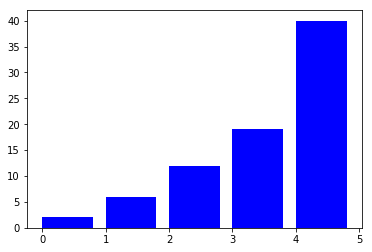

In [130]:
# Create a bar chart based upon the above data
plt.bar(x_axis, number_of_terminations, color="b", align="edge")

In [133]:
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, terminations)

NameError: name 'terminations' is not defined